Imports

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Solver

In [2]:
#SH Solver using RK4 for Nonlin part

def non_lin_rhs(w,R):
    return (R-1)*w - w**3

def integrateSH(w0,R,dt,nSteps,L,o4=False):
     """
     :param w0: initial temperature surface
     :param R: bifurcation parameter- can be a constant, or of same shape as w0
     :param dt: time step length
     :param nSteps: number of time steps to take
     :param L: Length of square over which w0 is defined
     :return w0: time evolution of w0 at time 0+dt*nSteps
     Ideally, the size of w0 is fft friendly, ie 2^n x 2^n
     """
     print("Starting time integration of Swift Hohenberg")
     ny, nx = np.shape(w0)
     print("Dimensions of w0:", nx, ny)
     kx = (2.*np.pi/L)*sp.fft.fftfreq(nx,1./nx)
     ky = (2.*np.pi/L)*sp.fft.fftfreq(ny,1./ny)
     Kx, Ky = np.meshgrid(kx,ky)
     fourierLaplacian = -(Kx**2+Ky**2)
     A = -(fourierLaplacian*fourierLaplacian)-2*fourierLaplacian
     for i in range(0,nSteps):
         # if i%100 == 0:
             # print("step number:",i)
         w1 = np.real(sp.fft.ifft2(np.exp(A*.5*dt)*sp.fft.fft2(w0)))

         #rk4 version
         if o4:
            k1 = dt*non_lin_rhs(w1, R)
            k2 = dt*non_lin_rhs(w1+.5*k1, R)
            k3 = dt*non_lin_rhs(w1+.5*k2, R)
            k4 = dt*non_lin_rhs(w1+k3, R)
            w2 = (k1+2*k2+2*k3+k4)/6 + w1

         #fwd euler version
         else:
            w2 = dt*((R-1)*w1-w1**3)+w1

         w0 = np.real(sp.fft.ifft2(np.exp(A*.5*dt)*sp.fft.fft2(w2)))
     return w0

Defines R when wanting to work over an ellipse

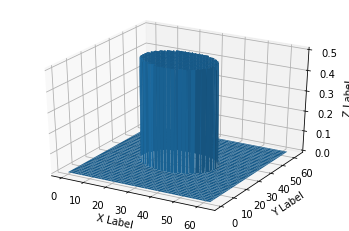

In [3]:
def fun(x, y, R):
    argmt = (x-10*np.pi)**2+2*(y-10*np.pi)**2-256.
    return R*(-1./(1.+np.exp(-argmt))+1.)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.linspace(0, 20*np.pi, 256)
X, Y = np.meshgrid(x, y)
R=.5
zs = np.array(fun(np.ravel(X), np.ravel(Y), R))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Main initial condition for chebfun comparisons

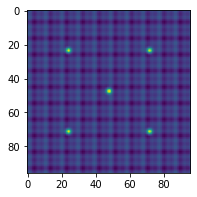

In [4]:
x = np.linspace(0,20*np.pi,96)
y = np.linspace(0,20*np.pi,96)
X,Y = np.meshgrid(x,y)
w0 = (1./20.)*(np.cos(X)+np.sin(2*X)+np.sin(Y)+np.cos(2*Y))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-10*np.pi)**2 +(Y-10*np.pi)**2)))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax.imshow(w0)


Test 1a (Using Initial condiition from Chebfun Docs)

Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256
Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256
Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256
Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256


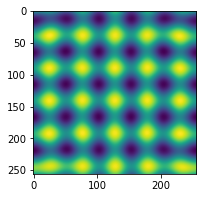

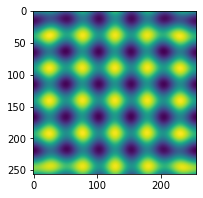

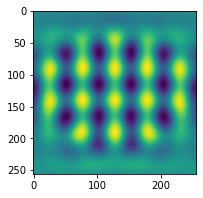

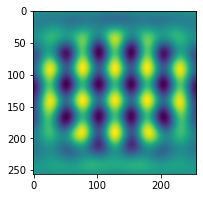

In [5]:
x = np.linspace(-16,16,256)
y = np.linspace(-16,16,256)
X,Y = np.meshgrid(x,y)
w0 = (1./20.)*(np.cos(X)+np.sin(2*X)+np.sin(Y)+np.cos(2*Y))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-10*np.pi)**2 +(Y-10*np.pi)**2)))
dt = .1
R=.5
L=x[len(x)-1]-x[0]
nSteps = 100

W1 = integrateSH(w0,R,dt,nSteps,L)
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax1.imshow(W1)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH1.pdf")

W1_o4 = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig1_o4, ax1_o4 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax1_o4.imshow(W1_o4)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH1_o4.pdf")

#Running the Methods on the Ellipse
R=.5*(-1./(1.+np.exp(-(X**2+2*Y**2-256.)))+1.)

W1_Ell = integrateSH(w0,R,dt,nSteps,L)
fig1_Ell, ax1_Ell = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax1_Ell.imshow(W1_Ell)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH1_Ell.pdf")

W1_o4_Ell = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig1_o4_Ell, ax1_o4_Ell = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax1_o4_Ell.imshow(W1_o4_Ell)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH1_o4_Ell.pdf")

Test 1b (Using initial condition .1*(np.cos(X)+np.sin(Y)))

Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256
Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256
Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256
Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256


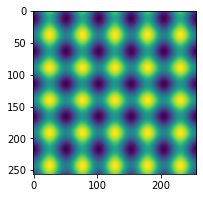

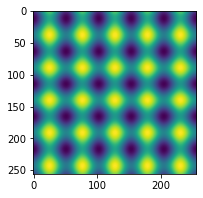

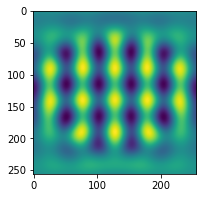

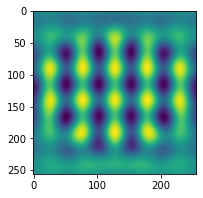

In [6]:
x = np.linspace(-16,16,256)
y = np.linspace(-16,16,256)
X,Y = np.meshgrid(x,y)
w0 = .1*(np.cos(X)+np.sin(Y))
dt = .1
R=.5
L=x[len(x)-1]-x[0]
nSteps = 100

W1b = integrateSH(w0,R,dt,nSteps,L)
fig1b, ax1b = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax1b.imshow(W1b)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH1b.pdf")

W1_o4b = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig1_o4b, ax1_o4b = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax1_o4b.imshow(W1_o4b)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH1_o4b.pdf")

#Running the Methods on the Ellipse
R=.5*(-1./(1.+np.exp(-(X**2+2*Y**2-256.)))+1.)

W1_Ellb = integrateSH(w0,R,dt,nSteps,L)
fig1_Ellb, ax1_Ellb = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax1_Ellb.imshow(W1_Ellb)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH1_Ellb.pdf")

W1_o4_Ellb = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig1_o4_Ellb, ax1_o4_Ellb = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax1_o4_Ellb.imshow(W1_o4_Ellb)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH1_o4_Ellb.pdf")


Test 2a (Using Initial condiition from Chebfun Docs)

Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128


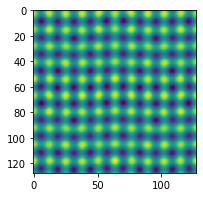

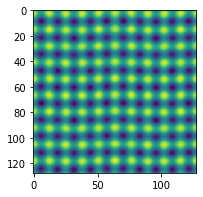

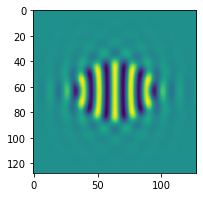

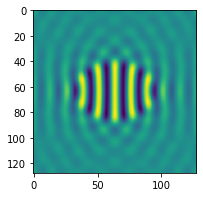

In [7]:
x = np.linspace(0,20*np.pi,128)
y = np.linspace(0,20*np.pi,128)
X,Y = np.meshgrid(x,y)
w0 = (1./20.)*(np.cos(X)+np.sin(2*X)+np.sin(Y)+np.cos(2*Y))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-10*np.pi)**2 +(Y-10*np.pi)**2)))
dt = 2e-1
R= 1e-2
L=x[len(x)-1]-x[0]
nSteps = 1000

W2 = integrateSH(w0,R,dt,nSteps,L)
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax2.imshow(W2)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH2.pdf")

W2_o4 = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig2_o4, ax2_o4 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax2_o4.imshow(W2_o4)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH2_o4.pdf")

#Running the Methods on the Ellipse
R=.5*(-1./(1.+np.exp(-((X-10*np.pi)**2+2*(Y-10*np.pi)**2-256.)))+1.)

W2_Ell = integrateSH(w0,R,dt,nSteps,L)
fig2_Ell, ax2_Ell = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax2_Ell.imshow(W2_Ell)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH2_Ell.pdf")

W2_o4_Ell = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig2_o4_Ell, ax2_o4_Ell = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax2_o4_Ell.imshow(W2_o4_Ell)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH2_o4_Ell.pdf")

Test 2b (Using initial condition .1*(np.cos(X)+np.sin(Y)))

Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128


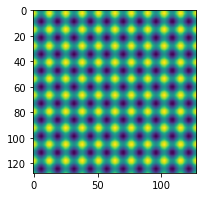

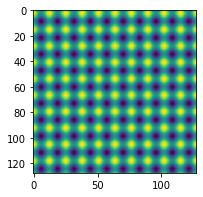

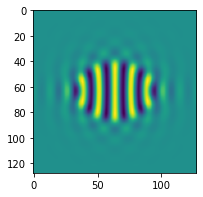

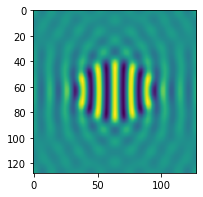

In [8]:
x = np.linspace(0,20*np.pi,128)
y = np.linspace(0,20*np.pi,128)
X,Y = np.meshgrid(x,y)
w0 = .1*(np.cos(X)+np.sin(Y))
dt = 2e-1
R= 1e-2
L=x[len(x)-1]-x[0]
nSteps = 1000

W2b = integrateSH(w0,R,dt,nSteps,L)
fig2b, ax2b = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax2b.imshow(W2b)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH2b.pdf")

W2_o4b = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig2_o4b, ax2_o4b = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax2_o4b.imshow(W2_o4b)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH2_o4b.pdf")

#Running the Methods on the Ellipse
R=.5*(-1./(1.+np.exp(-((X-10*np.pi)**2+2*(Y-10*np.pi)**2-256.)))+1.)

W2_Ellb = integrateSH(w0,R,dt,nSteps,L)
fig2_Ellb, ax2_Ellb = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax2_Ellb.imshow(W2_Ellb)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH2_Ellb.pdf")

W2_o4_Ellb = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig2_o4_Ellb, ax2_o4_Ellb = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax2_o4_Ellb.imshow(W2_o4_Ellb)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH2_o4_Ellb.pdf")

Test 3a (Using Initial condiition from Chebfun Docs)

Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256
Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256
Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256
Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256


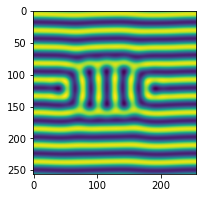

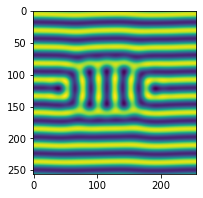

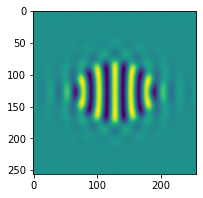

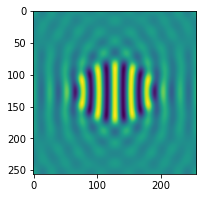

In [6]:
x = np.linspace(0,20*np.pi,256)
y = np.linspace(0,20*np.pi,256)
X,Y = np.meshgrid(x,y)
w0 = (1./20.)*(np.cos(X)+np.sin(2*X)+np.sin(Y)+np.cos(2*Y))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-10*np.pi)**2 +(Y-10*np.pi)**2)))
dt = 2e-1
R= 7e-1
L=x[len(x)-1]-x[0]
nSteps = 1000

W3 = integrateSH(w0,R,dt,nSteps,L)
fig3, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax3.imshow(W3)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns_wip/code/figs/sh_num_tsts_1018/mySH3.pdf")

W3_o4 = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig3_o4, ax3_o4 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax3_o4.imshow(W3_o4)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns_wip/code/figs/sh_num_tsts_1018/mySH3_o4.png")

#Running the Methods on the Ellipse
R=.5*(-1./(1.+np.exp(-((X-10*np.pi)**2+2*(Y-10*np.pi)**2-256.)))+1.)

W3_Ell = integrateSH(w0,R,dt,nSteps,L)
fig3_Ell, ax3_Ell = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax3_Ell.imshow(W3_Ell)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns_wip/code/figs/sh_num_tsts_1018/mySH3_Ell.pdf")

W3_o4_Ell = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig3_o4_Ell, ax3_o4_Ell = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax3_o4_Ell.imshow(W3_o4_Ell)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns_wip/code/figs/sh_num_tsts_1018/mySH3_o4_Ell.pdf")

Test 3b (Using initial condition .1*(np.cos(X)+np.sin(Y)))

Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256
Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256
Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256
Starting time integration of Swift Hohenberg
Dimensions of w0: 256 256


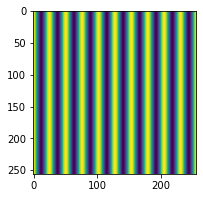

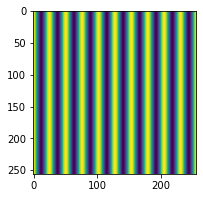

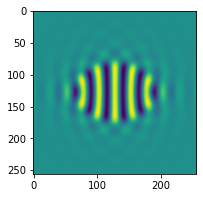

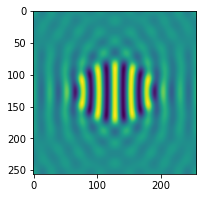

In [10]:
x = np.linspace(0,20*np.pi,256)
y = np.linspace(0,20*np.pi,256)
X,Y = np.meshgrid(x,y)
w0 = .1*(np.cos(X)+np.sin(Y))
dt = 2e-1
R= 7e-1
L=x[len(x)-1]-x[0]
nSteps = 1000

W3b = integrateSH(w0,R,dt,nSteps,L)
fig3b, ax3b = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax3b.imshow(W3b)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH3b.pdf")

W3_o4b = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig3_o4b, ax3_o4b = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax3_o4b.imshow(W3_o4b)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH3_o4b.pdf")

#Running the Methods on the Ellipse
R=.5*(-1./(1.+np.exp(-((X-10*np.pi)**2+2*(Y-10*np.pi)**2-256.)))+1.)

W3_Ellb = integrateSH(w0,R,dt,nSteps,L)
fig3_Ellb, ax3_Ellb = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax3_Ellb.imshow(W3_Ellb)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH3_Ellb.pdf")

W3_o4_Ellb = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig3_o4_Ellb, ax3_o4_Ellb = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax3_o4_Ellb.imshow(W3_o4_Ellb)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH3_o4_Ellb.pdf")

Test 4a (Using Initial condiition from Chebfun Docs)

Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128


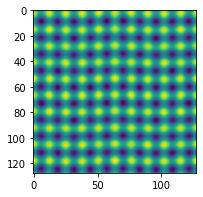

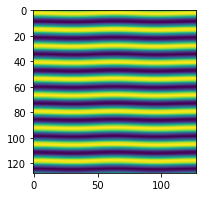

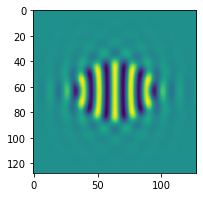

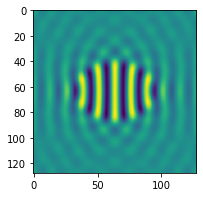

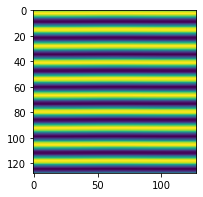

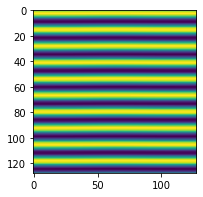

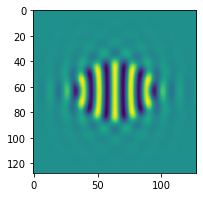

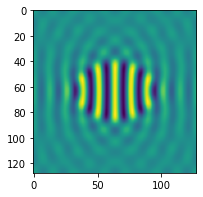

In [11]:
x = np.linspace(0,20*np.pi,128)
y = np.linspace(0,20*np.pi,128)
X,Y = np.meshgrid(x,y)
w0 = (1./20.)*(np.cos(X)+np.sin(2*X)+np.sin(Y)+np.cos(2*Y))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-5*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-15*np.pi)**2)))
w0 = w0 + (np.exp(-((X-15*np.pi)**2 +(Y-5*np.pi)**2)))
w0 = w0 + (np.exp(-((X-10*np.pi)**2 +(Y-10*np.pi)**2)))
dt = 2e-1
R= 1e-1
L=x[len(x)-1]-x[0]
nSteps = 1000

W4 = integrateSH(w0,R,dt,nSteps,L)
fig4, ax4 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4.imshow(W4)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4.pdf")

W4_o4 = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig4_o4, ax4_o4 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4_o4.imshow(W4_o4)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4_o4.pdf")

#Running the Methods on the Ellipse
R=.5*(-1./(1.+np.exp(-((X-10*np.pi)**2+2*(Y-10*np.pi)**2-256.)))+1.)

W4_Ell = integrateSH(w0,R,dt,nSteps,L)
fig4_Ell, ax4_Ell = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4_Ell.imshow(W4_Ell)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4_Ell.pdf")

W4_o4_Ell = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig4_o4_Ell, ax4_o4_Ell = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4_o4_Ell.imshow(W4_o4_Ell)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4_o4_Ell.pdf")

#Repeating for 10000 steps

nSteps = 10000

R= 1e-1
W4_10000 = integrateSH(w0,R,dt,nSteps,L)
fig4_10000, ax4_10000 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4_10000.imshow(W4_10000)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4_10000.pdf")

W4_o4_10000 = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig4_o4_10000, ax4_o4_10000 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4_o4_10000.imshow(W4_o4_10000)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4_o4_10000.pdf")

#Running the Methods on the Ellipse
R=.5*(-1./(1.+np.exp(-((X-10*np.pi)**2+2*(Y-10*np.pi)**2-256.)))+1.)

W4_Ell_10000 = integrateSH(w0,R,dt,nSteps,L)
fig4_Ell_10000, ax4_Ell_10000 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4_Ell_10000.imshow(W4_Ell)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4_Ell_10000.pdf")

W4_o4_Ell_10000 = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig4_o4_Ell_10000, ax4_o4_Ell_10000 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4_o4_Ell_10000.imshow(W4_o4_Ell_10000)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4_o4_Ell_10000.pdf")

Test 4b (Using initial condition .1*(np.cos(X)+np.sin(Y)))

Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128
Starting time integration of Swift Hohenberg
Dimensions of w0: 128 128


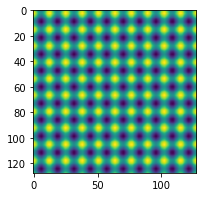

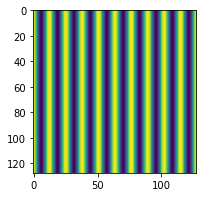

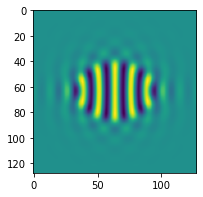

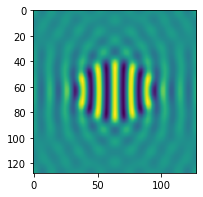

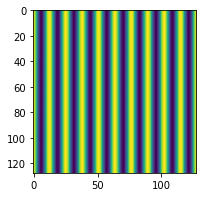

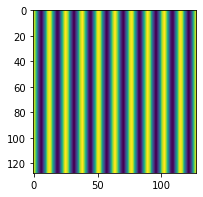

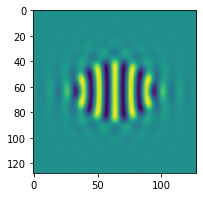

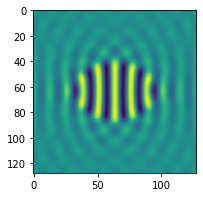

In [12]:
x = np.linspace(0,20*np.pi,128)
y = np.linspace(0,20*np.pi,128)
X,Y = np.meshgrid(x,y)
w0 = .1*(np.cos(X)+np.sin(Y))
dt = 2e-1
R= 1e-1
L=x[len(x)-1]-x[0]
nSteps = 1000

W4b = integrateSH(w0,R,dt,nSteps,L)
fig4b, ax4b = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4b.imshow(W4b)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4b.pdf")

W4_o4b = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig4_o4b, ax4_o4b = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4_o4b.imshow(W4_o4b)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4_o4b.pdf")

#Running the Methods on the Ellipse
R=.5*(-1./(1.+np.exp(-((X-10*np.pi)**2+2*(Y-10*np.pi)**2-256.)))+1.)

W4_Ellb = integrateSH(w0,R,dt,nSteps,L)
fig4_Ellb, ax4_Ellb = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4_Ellb.imshow(W4_Ellb)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4_Ellb.pdf")

W4_o4_Ellb = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig4_o4_Ellb, ax4_o4_Ellb = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4_o4_Ellb.imshow(W4_o4_Ellb)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4_o4_Ellb.pdf")

#Repeating for 10000 steps

nSteps = 10000

R= 1e-1
W4b_10000 = integrateSH(w0,R,dt,nSteps,L)
fig4b_10000, ax4b_10000 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4b_10000.imshow(W4b_10000)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4b_10000.pdf")

W4_o4b_10000 = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig4_o4b_10000, ax4_o4b_10000 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4_o4b_10000.imshow(W4_o4b_10000)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4_o4b_10000.pdf")

#Running the Methods on the Ellipse
R=.5*(-1./(1.+np.exp(-((X-10*np.pi)**2+2*(Y-10*np.pi)**2-256.)))+1.)

W4_Ellb_10000 = integrateSH(w0,R,dt,nSteps,L)
fig4_Ellb_10000, ax4_Ellb_10000 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4_Ellb_10000.imshow(W4_Ellb_10000)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4_Ellb_10000.pdf")

W4_o4_Ellb_10000 = integrateSH(w0,R,dt,nSteps,L,o4=True)
fig4_o4_Ellb_10000, ax4_o4_Ellb_10000 = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
ax4_o4_Ellb_10000.imshow(W4_o4_Ellb_10000)
plt.savefig("/Users/edwardmcdugald/Research/convection_patterns/code/figs/sh_num_tsts_1018/mySH4_o4_Ellb_10000.pdf")